In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import numpy as np

# Load data
log_df = pd.read_csv("gameplay_log.csv")
log_df.columns = log_df.columns.str.strip()
summary_df = pd.read_csv("player_summary.csv")

In [5]:
# Load and clean CSV
log_df = pd.read_csv("gameplay_log.csv")
log_df.columns = log_df.columns.str.strip()

# Check for NaN values in winnings
log_df['session_winnings'] = log_df['session_winnings'].fillna(0)

# Key counts
total_sessions = log_df["player_name"].nunique()
total_wins = (log_df["session_winnings"] > 0).sum()
jackpot_wins = (log_df["session_winnings"] >= 50).sum()
total_spins = log_df["session_spins"].sum()
total_winnings = log_df["session_winnings"].sum()
total_bet = log_df["bet_amount"].sum()

# Derived metrics
hit_rate = round(total_wins / total_spins * 100, 2) if total_spins > 0 else 0
roi = round(((total_winnings - total_bet) / total_bet) * 100, 2) if total_bet > 0 else 0
median_balance = log_df["coin_balance"].median()
jackpot_percentage = round((jackpot_wins / total_wins) * 100, 2) if total_wins > 0 else 0

# Create enhanced summary table without the "Loss Count" row
enhanced_stats = pd.DataFrame([
    {
        "Feature": "Coin Balance",
        "Total": "-",
        "Average": round(log_df["coin_balance"].mean(), 2),
        "Median": median_balance,
        "Min": log_df["coin_balance"].min(),
        "Max": log_df["coin_balance"].max(),
        "Std Dev": round(log_df["coin_balance"].std(), 2),
        "% of Wins": "-",
        "ROI %": "-"
    },
    {
        "Feature": "Win Count",
        "Total": total_wins,
        "Average": round(total_wins / total_sessions, 2),
        "Median": "-",
        "Min": "-",
        "Max": "-",
        "Std Dev": "-",
        "% of Wins": "-",
        "ROI %": "-"
    },
    {
        "Feature": "Jackpot Count",
        "Total": jackpot_wins,
        "Average": "-",
        "Median": "-",
        "Min": "-",
        "Max": "-",
        "Std Dev": "-",
        "% of Wins": jackpot_percentage,
        "ROI %": "-"
    },
    {
        "Feature": "Hit Rate",
        "Total": "-",
        "Average": "-",
        "Median": "-",
        "Min": "-",
        "Max": "-",
        "Std Dev": "-",
        "% of Wins": f"{hit_rate}%",
        "ROI %": "-"
    },
    {
        "Feature": "Return on Investment",
        "Total": "-",
        "Average": "-",
        "Median": "-",
        "Min": "-",
        "Max": "-",
        "Std Dev": "-",
        "% of Wins": "-",
        "ROI %": f"{roi}%"
    }
])

enhanced_stats


,Feature,Total,Average,Median,Min,Max,Std Dev,% of Wins,ROI %
0,Coin Balance,-,912.24,922.0,700.0,1164.0,80.14,-,-
1,Win Count,1440,24.0,-,-,-,-,-,-
2,Jackpot Count,0,-,-,-,-,-,0.0,-
3,Hit Rate,-,-,-,-,-,-,8.37%,-
4,Return on Investment,-,-,-,-,-,-,-,45.97%


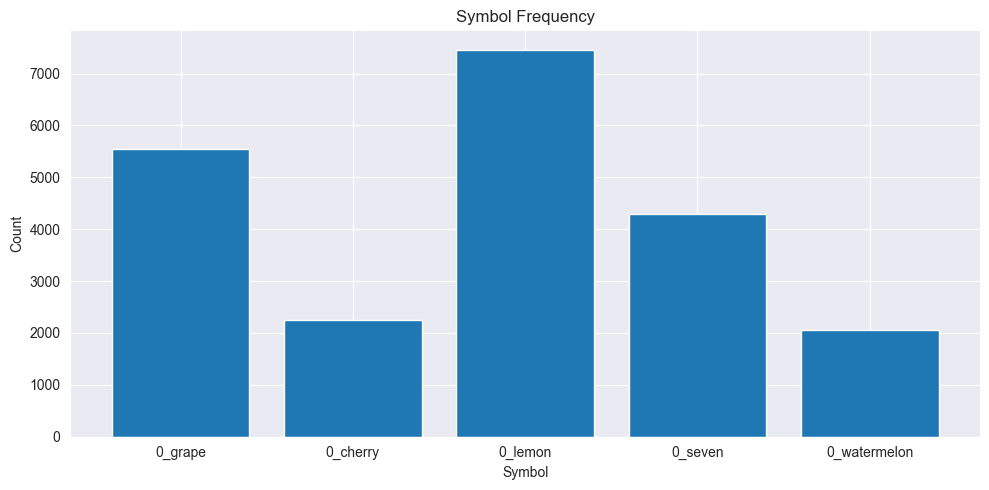

In [6]:
if "spin_result" in log_df.columns:
    symbol_counter = Counter()
    for result in log_df["spin_result"]:
        try:
            parsed = ast.literal_eval(result)
            for col in parsed.values():
                symbol_counter.update(col)
        except:
            continue

    # Plot
    if symbol_counter:
        symbols, counts = zip(*symbol_counter.items())
        plt.figure(figsize=(10, 5))
        plt.bar(symbols, counts)
        plt.title("Symbol Frequency")
        plt.xlabel("Symbol")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("No valid symbol data to plot.")
else:
    print("⚠️ 'spin_result' column not found in CSV.")

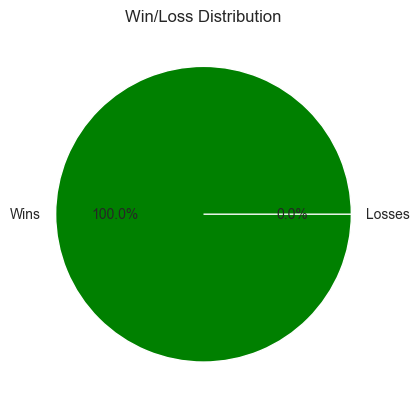

In [7]:
# Calculate win/loss
win_rows = log_df[log_df["session_winnings"] > 0]
loss_rows = log_df[log_df["session_winnings"] <= 0]

# Plot Win/Loss Pie Chart
plt.pie(
    [len(win_rows), len(loss_rows)],
    labels=["Wins", "Losses"],
    autopct='%1.1f%%',
    colors=["green", "red"]
)
plt.title("Win/Loss Distribution")
plt.show()


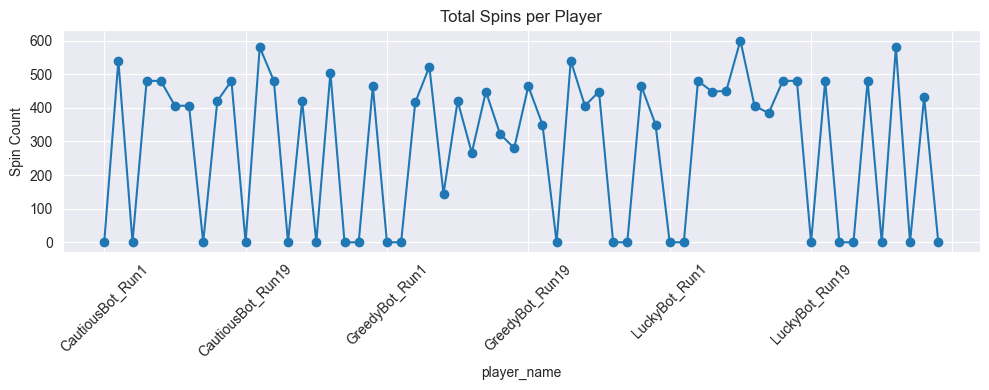

In [8]:
spins_per_player = log_df.groupby("player_name")["session_spins"].sum()
spins_per_player.plot(kind="line", marker="o", figsize=(10, 4))
plt.title("Total Spins per Player")
plt.ylabel("Spin Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


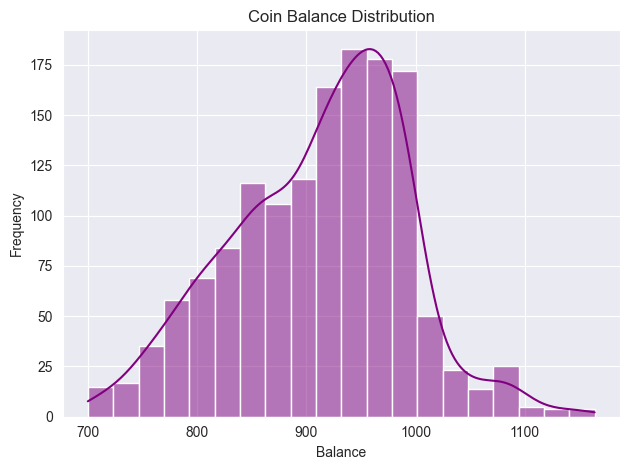

In [9]:
sns.histplot(log_df["coin_balance"], bins=20, kde=True, color="purple")
plt.title("Coin Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
